In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data = pd.read_excel("input_data_quiz.xlsx")
data

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,5599.0,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,5599.0,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,5599.0,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,5599.0,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,5599.0,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5599.0,15/9-F-12,24.00,0.000,0.000,54.106,28.866,34.36061,54.106,68.550,25.420,694.0,105168.0,698.0
2496,5599.0,15/9-F-12,24.00,0.000,0.000,53.827,29.012,33.65804,53.827,71.856,25.148,692.0,104778.0,697.0
2497,5599.0,15/9-F-12,24.00,0.000,0.000,53.484,28.842,34.58774,53.484,71.553,24.808,707.0,106179.0,705.0
2498,5599.0,15/9-F-12,24.00,0.000,0.000,53.008,28.691,34.80917,53.008,71.980,24.331,706.0,104809.0,705.0


In [3]:
data.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2498.0,2499.000000,2498.000000,2492.000000,2493.000000,2492.000000,2495.000000,2495.000000,2496.000000,2496.000000,2490.000000,2495.000000,2495.000000
mean,5599.0,21.204106,98.946740,40.659215,97.328776,16.690249,66.177557,52.143907,80.020514,22.623661,1752.616867,255293.340681,2503.943487
std,0.0,6.970983,125.947923,51.722656,74.578452,6.578753,29.862094,24.416289,19.990477,23.531784,1736.284570,245136.405876,2057.812677
min,5599.0,0.000000,0.000000,0.000000,0.058000,0.000000,0.000000,0.000000,0.035000,0.058000,0.000000,0.000000,-458.000000
25%,5599.0,24.000000,0.000000,0.000000,33.614000,13.182000,48.259940,33.560500,79.332250,4.868250,295.500000,46059.000000,54.000000
50%,5599.0,24.000000,0.000000,0.000000,48.992000,16.474500,65.974740,45.963000,88.067500,14.415000,968.500000,149118.000000,3088.000000
75%,5599.0,24.000000,250.771250,106.397250,175.979000,20.661500,99.169365,64.519500,90.552000,32.230250,3056.250000,445882.000000,4554.000000
max,5599.0,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [4]:
data.drop(columns=['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE'],inplace=True)

In [5]:
data['AVG_DP_TUBING'].fillna((data['AVG_DP_TUBING'].mean()), inplace=True)
data['AVG_ANNULUS_PRESS'].fillna((data['AVG_ANNULUS_PRESS'].mean()), inplace=True)
data['AVG_CHOKE_SIZE_P'].fillna((data['AVG_CHOKE_SIZE_P'].mean()), inplace=True)
data['AVG_WHP_P'].fillna((data['AVG_WHP_P'].mean()), inplace=True)
data['AVG_WHT_P'].fillna((data['AVG_WHT_P'].mean()), inplace=True)
data['DP_CHOKE_SIZE'].fillna((data['DP_CHOKE_SIZE'].mean()), inplace=True)
data['BORE_GAS_VOL'].fillna((data['BORE_GAS_VOL'].mean()), inplace=True)
data['BORE_WAT_VOL'].fillna((data['BORE_WAT_VOL'].mean()), inplace=True)

In [6]:
data.dropna(inplace=True)

In [7]:
data.reset_index(inplace=True)
data.drop(columns=['index'],inplace=True)

In [8]:
data

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,11.50,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,24.00,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,22.50,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,23.15,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,24.00,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2484,24.00,54.106,28.866,34.36061,54.106,68.550,25.420,694.0,105168.0,698.0
2485,24.00,53.827,29.012,33.65804,53.827,71.856,25.148,692.0,104778.0,697.0
2486,24.00,53.484,28.842,34.58774,53.484,71.553,24.808,707.0,106179.0,705.0
2487,24.00,53.008,28.691,34.80917,53.008,71.980,24.331,706.0,104809.0,705.0


In [66]:
X = data.drop(columns = 'BORE_OIL_VOL')
y = data['BORE_OIL_VOL']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [68]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['ON_STREAM_HRS',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL']

In [70]:
clf.score(x_train,y_train)

1.0

In [71]:
x_test = pd.read_excel("test_data_quiz.xlsx")


In [72]:
x_test.drop(columns=['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE'],inplace=True)

In [73]:
x_test

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,24.0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,24.0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,24.0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,24.0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,24.0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0
...,...,...,...,...,...,...,...,...,...
494,24.0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0
495,24.0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0
496,24.0,NaN,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0
497,24.0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0


In [74]:
x_test.describe()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
count,499.000000,492.000000,493.000000,494.000000,496.000000,493.000000,494.000000,493.000000,492.000000
mean,23.425571,31.069900,20.000225,85.244240,31.243724,77.607957,4.199789,58162.770791,1105.152439
std,3.116973,8.867971,4.506915,27.554155,9.501805,8.006400,8.367061,25900.758834,243.461442
min,0.000000,1.265000,0.000000,0.127140,1.265000,9.408000,0.255000,0.000000,0.000000
25%,24.000000,26.518500,18.852000,97.916670,26.520750,77.533000,0.563000,35248.000000,1115.750000
50%,24.000000,27.571500,20.234000,100.000000,27.603500,79.580000,0.753000,56169.000000,1182.000000
75%,24.000000,29.661000,21.225000,100.000000,29.692750,80.533000,1.070750,79515.000000,1239.000000
max,24.000000,110.390000,28.870000,100.000000,110.390000,82.490000,81.751000,108156.000000,1566.000000


In [75]:
x_test['AVG_DP_TUBING'].fillna((x_test['AVG_DP_TUBING'].mean()), inplace=True)
x_test['AVG_ANNULUS_PRESS'].fillna((x_test['AVG_ANNULUS_PRESS'].mean()), inplace=True)
x_test['AVG_CHOKE_SIZE_P'].fillna((x_test['AVG_CHOKE_SIZE_P'].mean()), inplace=True)
x_test['AVG_WHP_P'].fillna((x_test['AVG_WHP_P'].mean()), inplace=True)
x_test['AVG_WHT_P'].fillna((x_test['AVG_WHT_P'].mean()), inplace=True)
x_test['DP_CHOKE_SIZE'].fillna((x_test['DP_CHOKE_SIZE'].mean()), inplace=True)
x_test['BORE_GAS_VOL'].fillna((x_test['BORE_GAS_VOL'].mean()), inplace=True)
x_test['BORE_WAT_VOL'].fillna((x_test['BORE_WAT_VOL'].mean()), inplace=True)

In [76]:
py_pred = clf.predict(x_test)
column_values=['predicted bore oil vol']

In [78]:
df = pd.DataFrame(data = py_pred, 
             
                  columns = column_values)

In [79]:
x_test = pd.read_excel("test_data_quiz.xlsx")

In [80]:
x_test

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0
496,5599,15/9-F-12,24.0,0,0,NaN,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0


In [82]:
 result = pd.concat([x_test, df], axis=1)


In [83]:
result

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,predicted bore oil vol
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0,707.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0,707.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0,707.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0,635.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0,635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0,89.0
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0,89.0
496,5599,15/9-F-12,24.0,0,0,NaN,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0,89.0
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0,89.0


In [85]:
writer = pd.ExcelWriter("dataframe.xlsx", engine='xlsxwriter')
result.to_excel(writer, index=False)
writer.save() 

In [27]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

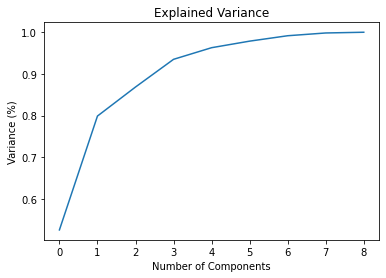

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [31]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [32]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,4.833332,0.942412,-2.062169,1.091904,1.119856,-1.283227,-0.259755,-0.360226
1,4.045076,-1.054497,-2.174689,-0.124033,-0.039140,-0.440131,-0.580458,-0.408408
2,3.672351,-1.475770,-1.304433,-0.796386,-0.295127,0.191337,-0.071935,0.075021
3,3.989330,-0.809100,-1.437852,-1.621054,-0.222432,0.532484,-0.499631,-0.184312
4,3.649642,-1.365483,-1.580797,-0.819546,-0.266830,0.217439,-0.305806,-0.171780
...,...,...,...,...,...,...,...,...
2484,0.281075,-0.147860,-0.680062,2.045756,-0.953155,-0.549214,-0.416576,-0.651369
2485,0.218403,-0.207337,-0.688407,2.062799,-0.990394,-0.417292,-0.383394,-0.640566
2486,0.203496,-0.192115,-0.665703,2.032881,-0.981604,-0.435802,-0.379227,-0.645711
2487,0.179393,-0.180371,-0.645305,2.016729,-0.986165,-0.414339,-0.379450,-0.650759


In [33]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.08701472556894244

In [34]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [35]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [36]:
grid_search.fit(x_train,y_train)

C:\Users\A-0125\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [37]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}


In [38]:
grid_search.best_score_

0.09874683002338372

In [39]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [40]:
clf.score(x_test,y_test)

0.09103078982597054